# GRIP : The Sparks Foundation

# Data Science and Business Analytics Intern

# Author : Sanjana Kathiriya

# Task 1 : Prediction Using Supervised ML

# Problem Statement : Predict the perecentage of the student based on the no. of hours student studied using Simple Linear Regression model which involves two variables.

# Importing the required libraries

In [1]:
import numpy as np # for data frame
import pandas as pd # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
import seaborn as sns

In [2]:
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# Reading Data from remote url

In [3]:
url="http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for null values

In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing with scatter plot

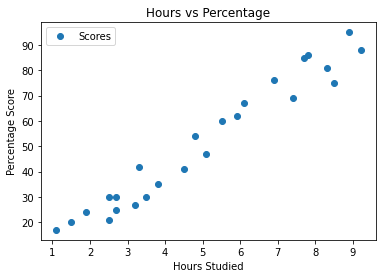

In [9]:
#Checking the relation between Independent and Target Variable
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
From the above graph, we can clearly see that there is a positive linear relation between the number of houes studied
and percentage of score.

# Checking for Outlier Values

<AxesSubplot:xlabel='Hours'>

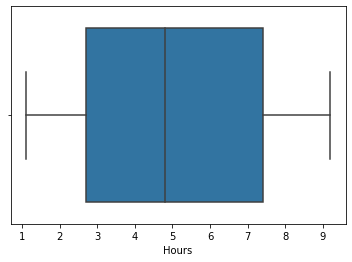

In [10]:
sns.boxplot(df['Hours'])

<AxesSubplot:xlabel='Scores'>

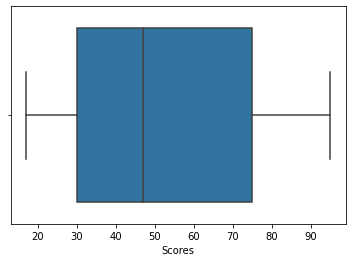

In [11]:
sns.boxplot(df['Scores'])

In [ ]:
From the above boxplot representation, it is clear that there are no outlier values in the data

# Checking the correlation

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

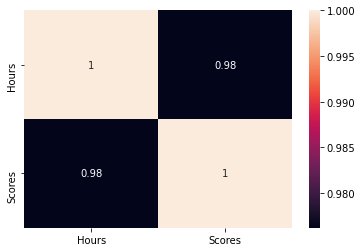

In [13]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
From above correlation matrix, it is clear that Hours and Scores are strongly correlated

# Dividing the data in to attributes (inputs) and labels (outputs)

In [14]:
X=df.Hours
y=df.Scores

# Splitting the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

# Training the Linear Regression Model

In [ ]:
# Making an object names model 

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

In [18]:
model.fit(X_train,y_train)

LinearRegression()

# Checking the accuracy scores for training and test set

In [19]:
print('Test Score')
print(model.score(X_test, y_test))
print('Training Score')
print(model.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


# Plotting the best fitted line on the graph

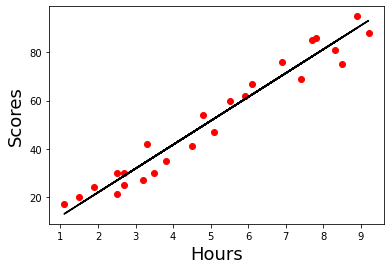

In [20]:
m=model.coef_
c=model.intercept_    
line=m*X+c
plt.scatter(X,y,color='r')
plt.plot(X,line,'black')
plt.xlabel(xlabel='Hours',fontsize=18)
plt.ylabel(ylabel='Scores',fontsize=18)
plt.show()

# Making Prediction

In [21]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Evaluating the Model

In [23]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2_score Error:',r2_score(y_test, y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
r2_score Error: 0.9454906892105356
Mean Squared Error:  21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# What will be predicted score if a student study for 9.25 hrs in a day?

In [24]:
# Testting the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


# Thank you...